In [1]:
from ultralytics import YOLO

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [3]:
plt.rcParams["figure.figsize"] = [3.0, 3.0]

In [4]:
from yolo_cam.eigen_cam import EigenCAM
from yolo_cam.utils.image import show_cam_on_image, scale_cam_image

In [5]:
model = YOLO('models/yolov8n.pt')
model = model.cpu()

In [36]:
img = cv2.imread('data/images/000022704.jpg')
img = cv2.resize(img, (640, 640))
rgb_img = img.copy()
print("rgb_img shape:", rgb_img.shape)
img = np.float32(img) / 255

rgb_img shape: (640, 640, 3)


In [39]:
target_layers =[model.model.model[-5]]
print(target_layers)

[C2f(
  (cv1): Conv(
    (conv): Conv2d(192, 128, kernel_size=(1, 1), stride=(1, 1))
    (act): SiLU(inplace=True)
  )
  (cv2): Conv(
    (conv): Conv2d(192, 128, kernel_size=(1, 1), stride=(1, 1))
    (act): SiLU(inplace=True)
  )
  (m): ModuleList(
    (0): Bottleneck(
      (cv1): Conv(
        (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (act): SiLU(inplace=True)
      )
      (cv2): Conv(
        (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (act): SiLU(inplace=True)
      )
    )
  )
)]



0: 640x640 11 persons, 232.1ms
Speed: 3.6ms preprocess, 232.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


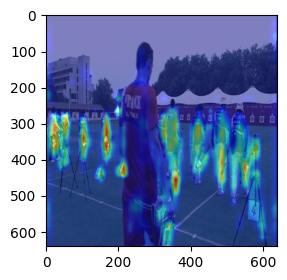

In [40]:
cam = EigenCAM(model, target_layers,task='od')
grayscale_cam = cam(rgb_img)[0, :, :]
cam_image = show_cam_on_image(img, grayscale_cam, use_rgb=True)
plt.imshow(cam_image)
plt.show()

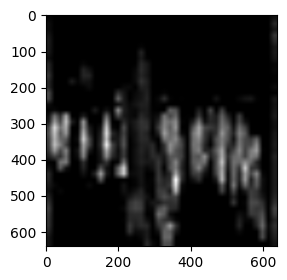

In [41]:
import matplotlib.pyplot as plt
g_scale = np.stack([grayscale_cam] * 3, axis=2)
plt.imshow(g_scale)

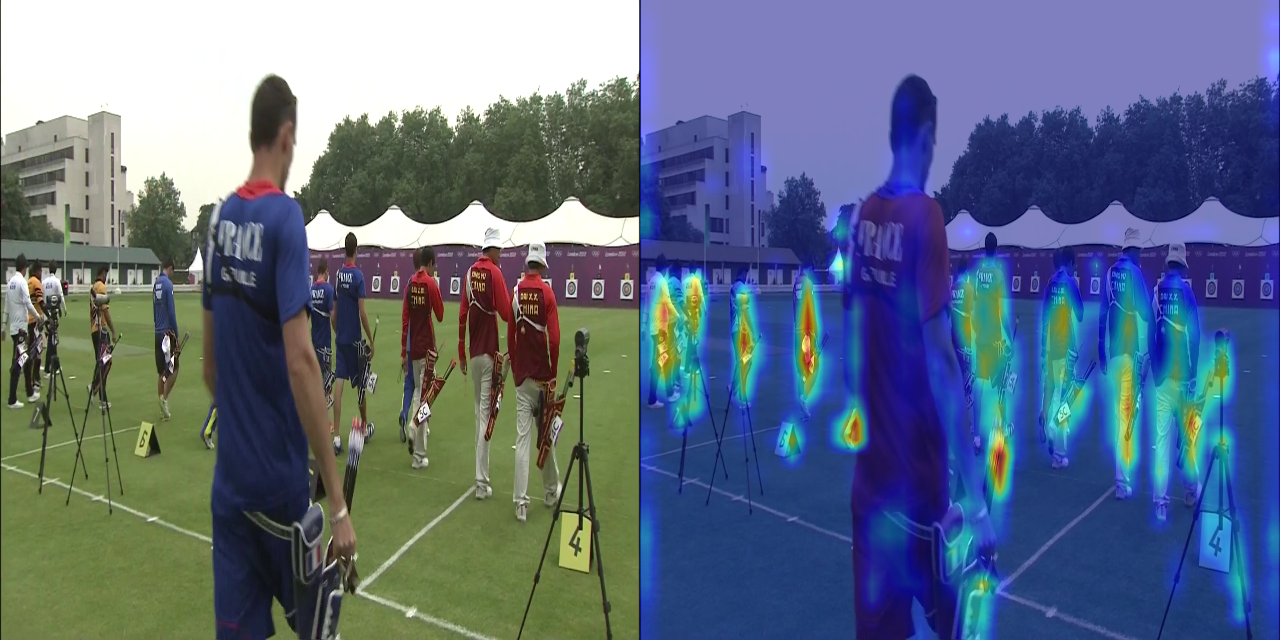

In [42]:
im = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2BGR)
Image.fromarray(np.hstack((im, cam_image)))